In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle #thư viện lưu các đối tượng giữa các quy trình
import os

In [31]:
df = pd.read_csv('AAPL-2005-2020.csv', index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-10,1.246964,1.262500,1.212143,1.231429,1.057325,1725309600
2005-01-11,1.218750,1.234821,1.145357,1.152857,0.989862,2611627200
2005-01-12,1.168750,1.176786,1.130357,1.168929,1.003662,1919702400
2005-01-13,1.316250,1.328929,1.245179,1.246429,1.070204,3164716800
2005-01-14,1.254464,1.280714,1.235536,1.253571,1.076337,1770742400


In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,19.738805,19.922022,19.550067,19.742796,18.285583,4.830986e+08
std,16.135081,16.270788,16.014384,16.152156,15.806546,4.105372e+08
min,1.168750,1.176786,1.130357,1.152857,0.989862,4.544800e+07
25%,5.288928,5.407322,5.217857,5.324554,4.571749,1.628507e+08
50%,16.279465,16.379106,16.077679,16.231071,14.137815,3.809400e+08
75%,29.053125,29.233126,28.796250,29.001874,26.850676,6.733118e+08
max,74.959999,75.224998,74.370003,75.087502,74.096443,3.372970e+09


In [16]:
df.info() #thông tin về bộ dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3774 non-null   object 
 1   Open       3774 non-null   float64
 2   High       3774 non-null   float64
 3   Low        3774 non-null   float64
 4   Close      3774 non-null   float64
 5   Adj Close  3774 non-null   float64
 6   Volume     3774 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 206.5+ KB


In [18]:
dates = list(range(0,int(len(df))))  #Đưa số lượng dòng vào thành list
prices = df['Close'] #Lấy dữ liệu cột close
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])  # median: xác định trung vị . Nó sẽ trả về giá trị trung vị của dữ liệu số cho trước bằng cách tính trung bình của hai điểm giữa nếu cần. Nếu số data point là lẻ, nó sẽ trả về điểm giữa. Nếu số data point là chẵn, nó sẽ trả về trung bình của hai giá trị trung vị.
#  isnan: kiểm tra xem giá trị có phải là null / NaN hay không. Nó sẽ trả về True nếu giá trị là NaN / null.
print(prices)

0        1.231429
1        1.152857
2        1.168929
3        1.246429
4        1.253571
          ...    
3769    73.412498
3770    75.087502
3771    74.357498
3772    74.949997
3773    74.597504
Name: Close, Length: 3774, dtype: float64


<ipython-input-18-5f10a327aba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])  # median: xác định trung vị . Nó sẽ trả về giá trị trung vị của dữ liệu số cho trước bằng cách tính trung bình của hai điểm giữa nếu cần. Nếu số data point là lẻ, nó sẽ trả về điểm giữa. Nếu số data point là chẵn, nó sẽ trả về trung bình của hai giá trị trung vị.


In [19]:
df['Date']=pd.to_datetime(df['Date'])
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe contains stock prices between 2005-01-10 00:00:00 2020-01-07 00:00:00
Total days = 5475 days


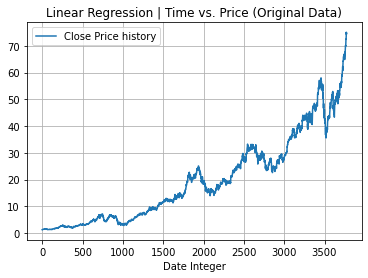

In [20]:
#Plot Original Data
plt.plot(df['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend() #Chú thích
plt.grid()
plt.xlabel('Date Integer')
plt.show()

In [21]:
#Convert to numpy array and reshape them
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

In [22]:
#Load Pickle File to get the previous saved model accuracy
try:
  pickle_in = open("prediction.pickle", "rb")
  reg = pickle.load(pickle_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, train_size=0.8, test_size=0.2, random_state=0)
  best = reg.score(ytrain, ytest)
except:
  pass

In [23]:
#Get the highest accuracy model
best = 0
for _ in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, train_size=0.8, test_size=0.2, random_state=0)
    reg = LinearRegression().fit(xtrain, ytrain)
    acc = reg.score(xtest, ytest)
    if acc > best:
        best = acc
        #Save model to pickle format
        with open('prediction.pickle','wb') as f:
            pickle.dump(reg, f)  #nhận đối tượng và chuyển nó thành một chuỗi gọi là quá trình giầm (pickling) sau đó lưu vào tập tin f
        print(acc)

0.8859219792429176


In [51]:
#Load linear regression model
pickle_in = open("prediction.pickle", "rb")
reg = pickle.load(pickle_in) #Tạo lại đối tượng từ một chuỗi được gọi là vớt (unpickling). f: đối tượng tập tin đã được mở để đọc

In [52]:
#Get the average accuracy of the model
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(df)) < 0.8 #là một mảng có kích thước len (df) với các giá trị float được phân phối ngẫu nhiên và đồng đều trong phạm vi [0, 1]. <0,8 áp dụng phần tử so sánh khôn ngoan và lưu trữ kết quả tại chỗ. Do đó giá trị <0,8 trở thành Đúng và giá trị> = 0,8 trở thành Sai
  xtest = dates[~msk] #~: là toán tử đảo ngược cho boolean
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)

print("Average Accuracy:", mean/10)

Average Accuracy: 0.8853256788910905


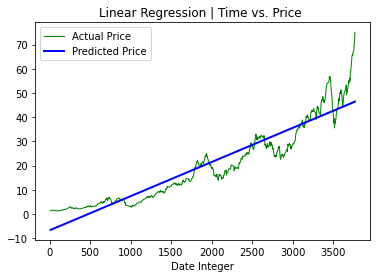

In [68]:
#Plot Predicted VS Actual Data
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price')                        #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=2, label = 'Predicted Price')       #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [14]:
#Execute order 66
from sklearn.metrics import r2_score
print("Giá trị R: ", r2_score(ytest, reg.predict(xtest)))

Giá trị R:  0.8863857988958519
